<a href="https://colab.research.google.com/github/samarkinav/ML/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Прогноз оттока клиентов банка** 


Мы хотим предсказать откажется клиент от услуг банка или нет, чтобы менеджеры могли вовремя обратиться к клиентам и сделать им выгодные предложения, которые обратят их решения. 

##1. Загрузка данных



In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 
import seaborn as sns 
import sklearn

In [79]:
url = "https://raw.githubusercontent.com/samarkinav/ML/samarkinav-test/BankChurners1.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о клиентах банка.
Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному клиенту) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [80]:
data_raw.shape

(10127, 21)

In [81]:
type(data_raw)

pandas.core.frame.DataFrame

In [149]:
data_raw.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Existing Customer
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Existing Customer
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Existing Customer
3,769911858,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Existing Customer
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Existing Customer


In [83]:
data_raw.tail()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,Existing Customer
10123,710638233,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Attrited Customer
10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,Attrited Customer
10125,717406983,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,Attrited Customer
10126,714337233,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,Attrited Customer


Мы видим, что столбцы (признаки) имеют названия:


*   CLIENTNUM - уникальный номер клиента
*   Customer_Age - возраст 
*   Gender - пол 
*   Dependent_count - количество зависимых счетов 
*   Education_Level - образование 
*   Marital_Status - семейное положение 
*   Income_Category - категория годового дохода 
*   Card_Category - тип карты 
*   Months_on_book - период отношений с банком
*   Total_Relationship_Count - кол-во продуктов, хранящихся у клиента 
*   Months_Inactive_12_mon - количество месяцев бездействия за последние 12 месяцев 
*   Contacts_Count_12_mon - количество дейтсвий по счёту за последние 12 месяцев 
*   Credit_Limit - кредитный лимит по карте 
*   Total_Revolving_Bal - общий возобновляемый остаток на кредитной карте 
*   Avg_Open_To_Buy - средний чек покупки (в среднем за последние 12 месяцев) 
*   Total_Amt_Chng_Q4_Q1 - изменение суммы транзакций (4 квартал по сравнению с 1 кварталом) 
*   Total_Trans_Amt - общая сумма транзакций (последние 12 месяцев) 
*   Total_Trans_Ct - общее количество транзакций (последние 12 месяцев) 
*   Total_Ct_Chng_Q4_Q1 - изменение количества транзакций (4 квартал по сравнению с 1 кварталом) 
*   Avg_Utilization_Ratio - средний коэффициент использования карты 


Признак Attrition_Flag указывает на то, закрыт счет или нет.
Требуется спрогнозировать отток клиентов банка. Это задача классификации.

In [84]:
data_raw.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag'],
      dtype='object')

In [85]:
data_raw.index

RangeIndex(start=0, stop=10127, step=1)

Исключим из рассмотрения столбец с уникальным номером клиента.

In [86]:

df = data_raw.drop(['CLIENTNUM'], axis = 1)

##2. Визуализация данных и вычисление основных характеристик

Вначале рассмотрим среднее значение, стандартное отклонение, минимальное и максимальное значения, медиану и квартили. По умолчанию этот метод даёт информацию только о количественных признаках.

In [87]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Получим информацию о категориальных признаках:

In [88]:
df.describe(include = ['object'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
count,10127,10127,10127,10127,10127,10127
unique,2,7,4,6,4,2
top,F,Graduate,Married,Less than $40K,Blue,Existing Customer
freq,5358,3128,4687,3561,9436,8500


Из таблицы видно, что данные в стоблце Attrition_Flag не являются сбалансированными, так как один из классов представляет около 16% от общего числа клиентов.

Построим попарные матрицы разброса:

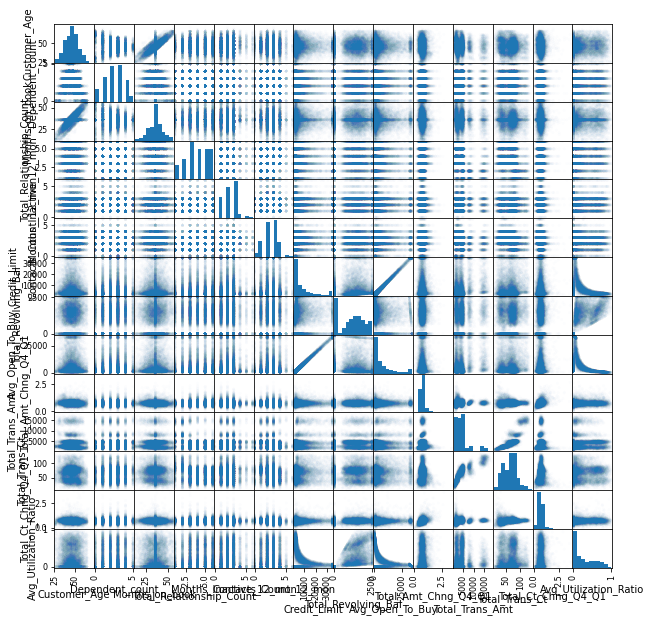

In [89]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = .01, figsize = (10, 10))
pass

Матрица корреляции для количественных признаков:

In [90]:
corr_mat = df.corr()
corr_mat

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем меньше по абсолютной величине коэффициент корреляции:

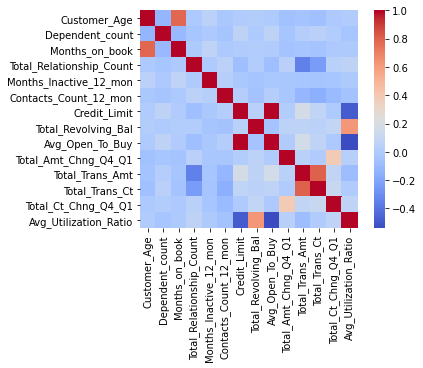

In [91]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции больше заданного значения 0,4:

In [92]:
corr_mat > 0.4

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,True,False,True,False,False,False,False,False,False,False,False,False,False,False
Dependent_count,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Months_on_book,True,False,True,False,False,False,False,False,False,False,False,False,False,False
Total_Relationship_Count,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Months_Inactive_12_mon,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Contacts_Count_12_mon,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Credit_Limit,False,False,False,False,False,False,True,False,True,False,False,False,False,False
Total_Revolving_Bal,False,False,False,False,False,False,False,True,False,False,False,False,False,True
Avg_Open_To_Buy,False,False,False,False,False,False,True,False,True,False,False,False,False,False
Total_Amt_Chng_Q4_Q1,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [93]:
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)

Credit_Limit         Avg_Open_To_Buy          0.995981
Total_Trans_Amt      Total_Trans_Ct           0.807192
Customer_Age         Months_on_book           0.788912
Total_Revolving_Bal  Avg_Utilization_Ratio    0.624022
dtype: float64

Заметим, что максимальный коэффициент корреляции достигается между признаки, отвечающими за:
*   кредитный лимит и среднюю стоимость покупки
*   общую сумму транзакций и кол-во транзакций (за последние 12 месяцев)
*   возраст клиента и длительность его отношений с банком
*   общий возобновляемый остаток на кредитной карте и средний коэф-т использования карты

Остальные признаки почти не коррелируют между собой.

##3. Обработка пропущенных значений

In [94]:
df.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

Заметим, что пропущенных значений NaN не имеется. Но в некоторых ячейках лежит строка 'Unknown', которая может быть интерпретирована нами, как пропущенное значение. 
Конвертируем все 'Unknown' в NaN.

In [105]:
for i in range(0, df.shape[0]):
        for j in range(0, df.shape[1]):
            if df.iloc[i,j] == 'Unknown':
                df.iloc[i, j] = np.nan

In [106]:
df.isna().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Attrition_Flag                 0
dtype: int64

Все пропущенные значения находятся в столбцах, соответствующих категориальным признакам. Заполним их модой.

In [108]:
df['Education_Level'].fillna(df['Education_Level'].mode().iloc[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode().iloc[0], inplace=True)
df['Income_Category'].fillna(df['Income_Category'].mode().iloc[0], inplace=True)

In [109]:
df.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [110]:
df.describe(include = 'all')

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127
unique,NaN,2,NaN,6,3,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Existing Customer
freq,NaN,5358,NaN,4647,5436,4673,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8500
mean,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN


##4. Обработка категориальных признаков

Нужно что-то сделать с категориальными (номинальными) признаками

In [111]:
Prediction = df['Attrition_Flag']
df = df.drop('Attrition_Flag', axis = 1)

In [112]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


Отдельная таблица для количественных признаков:

In [113]:
data_num = df[numerical_columns]
data_num

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Выделим бинарные и небинарные категориальные признаки:

In [114]:
data_describe = df.describe(include = [object])
for col in categorical_columns:
    df[col] = df[col].fillna(data_describe[col]['top'])
binary_columns    = [col for col in categorical_columns if data_describe[col]['unique'] == 2]
nonbinary_columns = [col for col in categorical_columns if data_describe[col]['unique'] > 2]
print(binary_columns)
print(nonbinary_columns)

['Gender']
['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


Бинарные признаки заменим на числовые:

In [115]:
for col in binary_columns:
    df[col] = pd.factorize(df[col])[0]

Отдельная таблица для бинарных признаков:

In [116]:
data_binary = df[binary_columns]
data_binary

,Gender
0,0
1,1
2,0
3,1
4,0
...,...
10122,0
10123,0
10124,1
10125,0


К небинарными признакам применим метод векторизации, который заключается в следующем. Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

In [117]:
data_nonbinary = pd.get_dummies(df[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver'],
      dtype='object')


Отдельная таблица для небинарных признаков:

In [118]:
data_nonbinary

,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
10123,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
10124,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
10125,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


##5. Нормализация

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.
Выполним стандартизацию (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению) всех признаков:

In [119]:
data_numerical = df[numerical_columns]
data_numerical.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [120]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [121]:
data_numerical.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,7.850056e-17,5.223639e-15,-1.001141e-16,-9.388516e-15,2.406521e-15,-3.133598e-15,1.089401e-14,2.578498e-17,1.157322e-14,-1.246541e-14,-7.467338e-16,-4.666785e-15,3.803383e-15,8.870492e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.535416e+00,-1.806289e+00,-2.870926e+00,-1.809422e+00,-2.316560e+00,-2.219546e+00,-7.914876e-01,-1.426788e+00,-8.212956e-01,-3.466775e+00,-1.146287e+00,-2.337140e+00,-2.991449e+00,-9.971058e-01
25%,-6.643487e-01,-1.036411e+00,-6.170990e-01,-5.227587e-01,-3.375813e-01,-4.115957e-01,-6.686217e-01,-9.862902e-01,-6.759270e-01,-5.882147e-01,-6.619078e-01,-8.460383e-01,-5.469550e-01,-9.136792e-01
50%,-4.065958e-02,-2.665340e-01,8.964070e-03,1.205731e-01,-3.375813e-01,-4.115957e-01,-4.492303e-01,1.388806e-01,-4.394762e-01,-1.092149e-01,-1.486803e-01,9.122586e-02,-4.293563e-02,-3.587110e-01
75%,7.077674e-01,5.033433e-01,5.098145e-01,7.639049e-01,6.519080e-01,4.923795e-01,2.679730e-01,7.622032e-01,2.628911e-01,4.518991e-01,9.917600e-02,6.876667e-01,4.442831e-01,8.273976e-01
max,3.327262e+00,2.043098e+00,2.513216e+00,1.407237e+00,3.620376e+00,3.204305e+00,2.847913e+00,1.661604e+00,2.975228e+00,1.203001e+01,4.144651e+00,3.158636e+00,1.260795e+01,2.626510e+00


Соединим всё в одну таблицу:

In [122]:
data = pd.concat((data_numerical, data_nonbinary, df[binary_columns]), axis = 1)
print(data.shape)

(10127, 33)


In [123]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.850056e-17,5.223639e-15,-1.001141e-16,-9.388516e-15,2.406521e-15,-3.133598e-15,1.089401e-14,2.578498e-17,1.157322e-14,-1.246541e-14,-7.467338e-16,-4.666785e-15,3.803383e-15,8.870492e-16,0.100030,0.044534,0.458872,0.198776,0.050953,0.146835,0.073862,0.536783,0.389355,0.071788,0.176755,0.138442,0.151575,0.461440,0.931767,0.011455,0.001975,0.054804,0.529081
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.300054,0.206289,0.498330,0.399098,0.219912,0.353959,0.261559,0.498670,0.487628,0.258150,0.381480,0.345380,0.358626,0.498536,0.252159,0.106416,0.044398,0.227608,0.499178
min,-2.535416e+00,-1.806289e+00,-2.870926e+00,-1.809422e+00,-2.316560e+00,-2.219546e+00,-7.914876e-01,-1.426788e+00,-8.212956e-01,-3.466775e+00,-1.146287e+00,-2.337140e+00,-2.991449e+00,-9.971058e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.643487e-01,-1.036411e+00,-6.170990e-01,-5.227587e-01,-3.375813e-01,-4.115957e-01,-6.686217e-01,-9.862902e-01,-6.759270e-01,-5.882147e-01,-6.619078e-01,-8.460383e-01,-5.469550e-01,-9.136792e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.065958e-02,-2.665340e-01,8.964070e-03,1.205731e-01,-3.375813e-01,-4.115957e-01,-4.492303e-01,1.388806e-01,-4.394762e-01,-1.092149e-01,-1.486803e-01,9.122586e-02,-4.293563e-02,-3.587110e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,7.077674e-01,5.033433e-01,5.098145e-01,7.639049e-01,6.519080e-01,4.923795e-01,2.679730e-01,7.622032e-01,2.628911e-01,4.518991e-01,9.917600e-02,6.876667e-01,4.442831e-01,8.273976e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.327262e+00,2.043098e+00,2.513216e+00,1.407237e+00,3.620376e+00,3.204305e+00,2.847913e+00,1.661604e+00,2.975228e+00,1.203001e+01,4.144651e+00,3.158636e+00,1.260795e+01,2.626510e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##6. Разбиение данных на обучающую и тестовую выборки

In [124]:
X = data
y = Prediction
feature_names = X.columns

In [125]:
type(feature_names)

pandas.core.indexes.base.Index

In [126]:
feature_names

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum',
       'Card_Category_Silver', 'Gender'],
      dtype='object')

70% выборки сделаем обучающей, остальные 30% - тестовой

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7088 3039


##7. Классификация и вычисление ошибок

###Метод ближайших соседей 
Для нового объекта алгоритм ищет в обучающей выборке k наиболее близких объектов и относит новый объект к тому классу, которому принадлежит большинство из них.

Вначале обучим модель:

In [128]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

После того, как модель обучена, мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делается это с помощью метода predict.
Нас интересует качество построенной модели, поэтому будем предсказывать значение выходного признака на тех данных, для которых оно известно: на обучающей и (что более важно) тестовой выборках:

In [129]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.06913092550790068 0.08950312602829878


Ошибки на обучающей и тестовой выборке равны соответственно 6,91% и 8,95%

Более важной является ошибка на тестовой выборке, так как мы должны уметь предсказывать правильное (по возможности) значение на новых объектах, которые при обучении были недоступны.
Попробуем уменьшить тестовую ошибку, варьируя параметры метода.

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

In [133]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.08281358322774979 10


В качестве оптимального метод выбрал значение k равное 10. Ошибка перекрестного контроля составила 8,28%, что даже больше ошибки на обучающей выборке для 10 ближайших соседей. Это может быть обусленно тем, что для построения моделей в рамках схемы перекрестного контроля используются не все данные.

###Метод SVC - машина опорных векторов

In [135]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.0475451467268623 0.06679828891082593


На тестовой выборке получили ошибку в 6,68%.

###Random Forest
Воспользуемся одним из самых популярных алгоритмов машинного обучения – случайный лес – Random Forest.
Алгоритм строит ансамбль случайных деревьев, каждое из которых обучается на выборке, полученной из исходной с помощью процедуры изъятия с возвращением.

In [136]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

0.0 0.05133267522211254


Ошибка на тестовой выборке составила 5,13%

Одной из важных процедур предобработки данных в алгоритмах их анализа является отбор значимых признаков. Его цель заключается в том, чтобы отобрать наиболее существенные признаки для решения рассматриваемой задачи классификации.

Упорядочим значимости и выведем их значения:


In [137]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'Total_Trans_Amt' (0.1640)
 2. feature 'Total_Trans_Ct' (0.1622)
 3. feature 'Total_Ct_Chng_Q4_Q1' (0.1165)
 4. feature 'Total_Revolving_Bal' (0.1036)
 5. feature 'Avg_Utilization_Ratio' (0.0652)
 6. feature 'Total_Amt_Chng_Q4_Q1' (0.0592)
 7. feature 'Total_Relationship_Count' (0.0553)
 8. feature 'Credit_Limit' (0.0374)
 9. feature 'Customer_Age' (0.0356)
10. feature 'Avg_Open_To_Buy' (0.0342)
11. feature 'Contacts_Count_12_mon' (0.0306)
12. feature 'Months_Inactive_12_mon' (0.0293)
13. feature 'Months_on_book' (0.0281)
14. feature 'Dependent_count' (0.0145)
15. feature 'Gender' (0.0089)
16. feature 'Marital_Status_Married' (0.0058)
17. feature 'Income_Category_Less than $40K' (0.0057)
18. feature 'Marital_Status_Single' (0.0054)
19. feature 'Education_Level_Graduate' (0.0050)
20. feature 'Education_Level_High School' (0.0036)
21. feature 'Income_Category_$80K - $120K' (0.0035)
22. feature 'Income_Category_$60K - $80K' (0.0034)
23. feature 'Income_Cat

Построим столбцовую диаграмму, графически представляющую значимость первых 20 признаков:

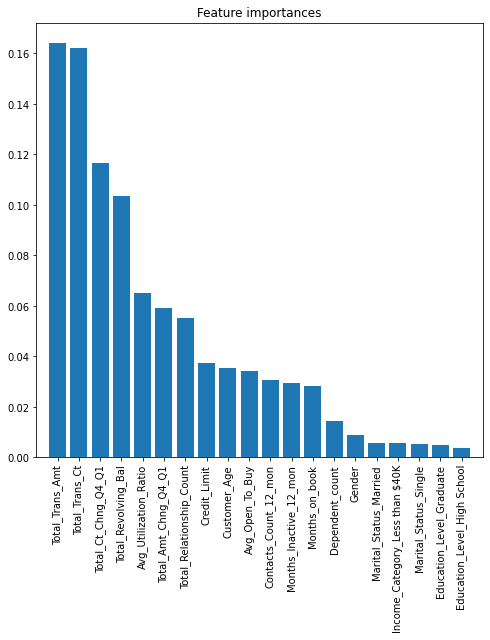

In [138]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [139]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
       'Total_Relationship_Count', 'Credit_Limit'],
      dtype='object')


Мы видим, что основную роль играют признаки 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count', 'Credit_Limit'.

###GBT – градиентный бустинг деревьев решений 
Это еще один метод, строящий ансамбль деревьев решений. На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь.

In [140]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

0.023984198645598195 0.036854228364593615


Ошибка на тестовой выборке составила 3,69%

###Использование только значимых признаков 

In [170]:
X = data.loc[:,['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1',
       'Total_Relationship_Count', 'Credit_Limit']]
y = Prediction

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7088 3039


In [172]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.06179458239277652 0.07798617966436328


Метод kNN - ошибка на тестовой выборке 7,8%

In [173]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.061512415349887134 0.07074695623560381


Метод SVC - ошибка на тестовой выборке 7,07%

In [174]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

0.0 0.04113195129976966


Метод RF - ошибка на тестовой выборке 4,11%

In [175]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

0.030756207674943567 0.04277722935176045


Метод GBT - ошибка на тестовой выборке 4,28%

Заметим, что при обучении модели на всех признаках лучшим проявил себя метод GBT с ошибкой 3,69%. При использовании только значимых признаков для обучения модели ошибка на тестовой выборке только увеличалась.

##8. Метод главных компонент (РСА)

In [180]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_model.fit(X)
print("Главные компоненты (по строкам):")
print(pca_model.components_)
print("Дисперсии по главным компонентам:")
print(pca_model.explained_variance_)

Главные компоненты (по строкам):
[[ 0.6322956   0.59011675  0.09627527 -0.03156971 -0.19905242  0.03898262
  -0.36578613  0.25837553]
 [ 0.13627432  0.18733936  0.26206775  0.56136778  0.65075088  0.19937067
   0.00287374 -0.31509736]]
Дисперсии по главным компонентам:
[2.06279721 1.79654583]


In [181]:
print("Среднеквадратические отклонения:")
print(np.sqrt(pca_model.explained_variance_))

Среднеквадратические отклонения:
[1.43624413 1.34035288]


In [193]:
pca_model = PCA(n_components = 2)
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(10127, 8)
(10127, 2)


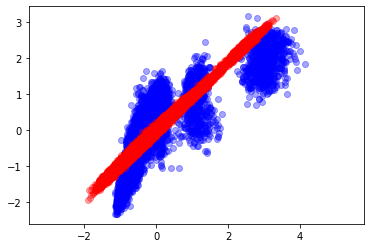

In [201]:
X_new = pca_model.inverse_transform(X_proj)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha = 0.35, color = 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.35, color = 'r')
plt.axis('equal');

In [202]:
pca_model = PCA(n_components = 0.85) # сохраняем 85% дисперсии
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(10127, 8)
(10127, 5)


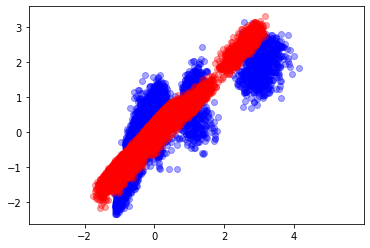

In [216]:
X_new = pca_model.inverse_transform(X_proj)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha = 0.35, color = 'b')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.35, color = 'r')
plt.axis('equal');